Evaluating the Effeciveness of Oral Cancer Treatments using Propensity Score Matching

## Task 1: Data Exploration and Confounding Variable Identification

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/content/oral_cancer_final.csv')

In [ ]:
df

,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Family History of Cancer,Compromised Immune System,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Survival,Treatment,Chemotherapy,Radiation,Surgery,Targeted Therapy
0,64.0,Male,1,1,1,0,1,Yes,No,0,...,0,0,1.782186,1,0.0,0,0,0,0,0
1,57.0,Male,1,1,0,1,1,Yes,No,0,...,1,0,5.763047,1,1.0,1,0,0,0,1
2,57.0,Male,1,0,1,0,1,No,No,1,...,0,0,6.672537,4,1.0,1,0,0,1,0
3,57.0,Male,0,0,0,0,0,Yes,No,0,...,0,1,2.574571,1,1.0,1,0,1,0,0
4,77.0,Male,1,1,0,1,0,No,No,0,...,0,1,5.248032,1,1.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,58.0,Male,1,1,0,0,1,Yes,No,0,...,0,1,3.975523,1,1.0,1,0,0,1,0
4231,47.0,Male,1,1,0,0,0,No,No,0,...,0,0,1.728834,2,0.0,0,0,0,0,0
4232,60.0,Male,1,1,0,0,0,Yes,No,0,...,0,0,3.643115,2,1.0,1,0,1,0,0
4233,50.0,Female,1,0,0,0,0,Yes,No,0,...,1,1,3.785160,1,1.0,0,0,0,0,0


In [ ]:
df.shape

(4235, 22)

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Tobacco Use,0
Alcohol Consumption,0
HPV Infection,0
Betel Quid Use,0
Chronic Sun Exposure,0
Poor Oral Hygiene,0
Family History of Cancer,0
Compromised Immune System,0


In [ ]:
df.describe(include='all')

,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Family History of Cancer,Compromised Immune System,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Survival,Treatment,Chemotherapy,Radiation,Surgery,Targeted Therapy
count,4235.000000,4235,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235,4235,4235.000000,...,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,2,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3110,NaN,NaN,NaN,NaN,NaN,2131,3807,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,58.482172,NaN,0.794097,0.595986,0.301771,0.304841,0.195514,NaN,NaN,0.111216,...,0.248642,0.350413,4.684983,2.246753,0.661393,0.798583,0.203306,0.192916,0.196458,0.205903
std,10.319911,NaN,0.404408,0.490758,0.459081,0.460394,0.396642,NaN,NaN,0.314437,...,0.432277,0.477156,1.606957,1.034723,0.473292,0.401106,0.402506,0.394634,0.397366,0.404408
min,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,1.002563,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,3.466852,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,4.678294,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,NaN,0.000000,...,0.000000,1.000000,5.899797,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


### Visualization of Variable Distributions

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='Count'>

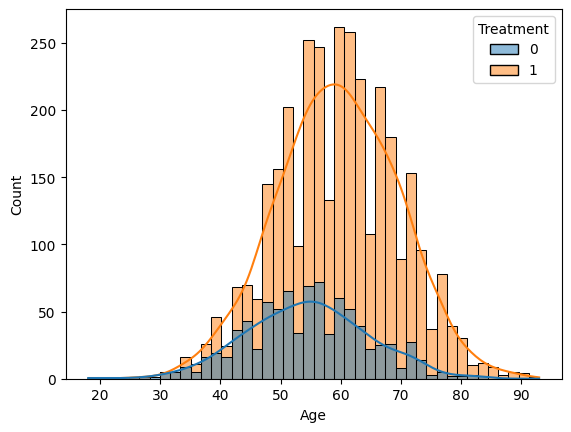

In [ ]:
# Numerical Variable: Age
sns.histplot(data=df, x='Age', hue='Treatment', kde=True)

<Axes: xlabel='Tumor Size (cm)', ylabel='Count'>

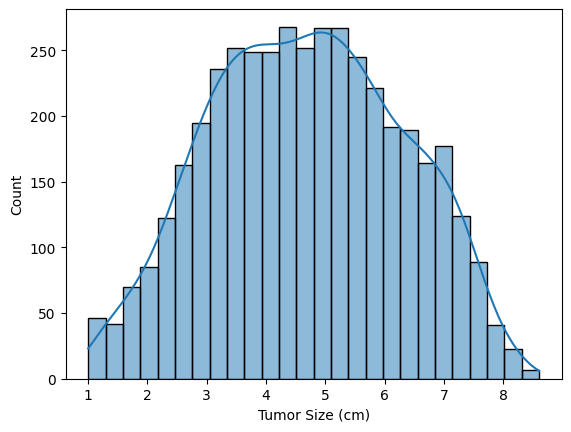

In [ ]:
# Plotting a histogram for Tumor Size
sns.histplot(data=df, x='Tumor Size (cm)', kde=True)

<Axes: xlabel='Cancer Stage', ylabel='Count'>

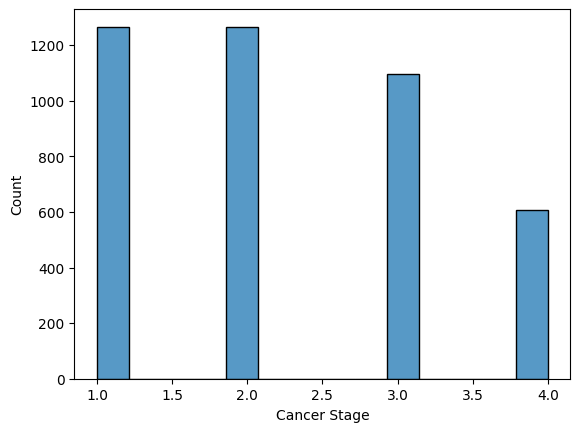

In [ ]:
# Plotting a histogram for Cancer Stage
sns.histplot(data=df, x='Cancer Stage')

<Axes: xlabel='Tobacco Use', ylabel='count'>

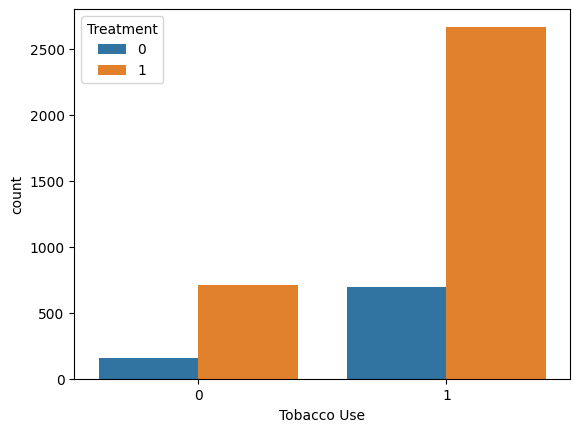

In [ ]:
# Plotting Barchart for Tobacco Use
sns.countplot(data=df, x='Tobacco Use', hue='Treatment')

<Axes: xlabel='Alcohol Consumption', ylabel='count'>

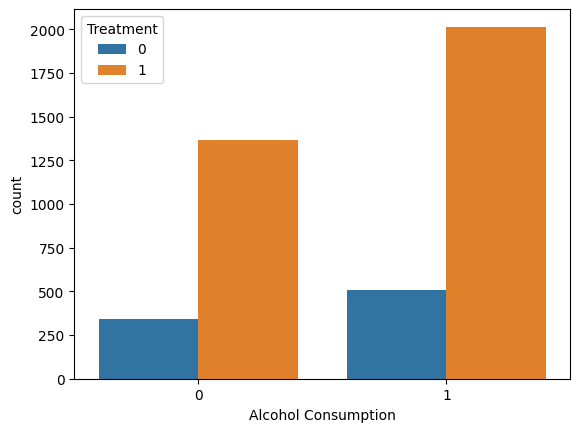

In [ ]:
# Plotting the bar charts for Alcohol Consumption
sns.countplot(data=df, x='Alcohol Consumption', hue='Treatment')

<Axes: xlabel='HPV Infection', ylabel='count'>

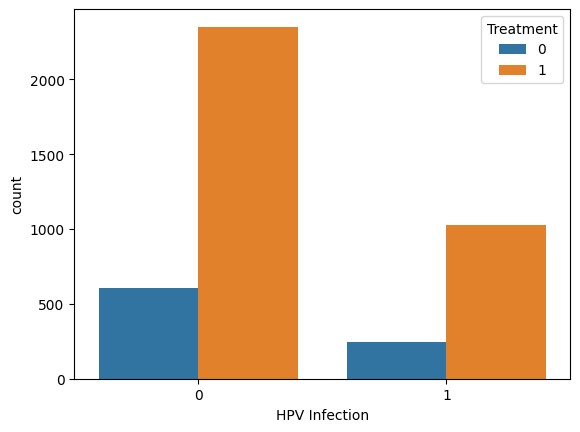

In [ ]:
# Plotting the bar charts for the HPV Infection
sns.countplot(data=df, x='HPV Infection', hue='Treatment')

<Axes: xlabel='Betel Quid Use', ylabel='count'>

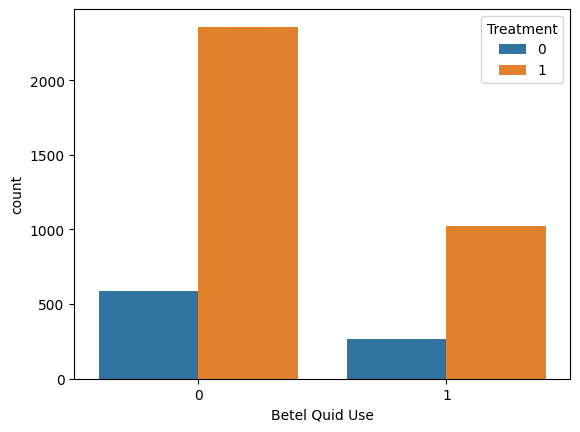

In [ ]:
# Plotting the Barcharts for the Betel Quid Use
sns.countplot(data=df, x='Betel Quid Use', hue='Treatment')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'No'),
  Text(1, 0, 'Extended family'),
  Text(2, 0, 'Mother'),
  Text(3, 0, 'Yes'),
  Text(4, 0, 'Sibling'),
  Text(5, 0, 'Father')])

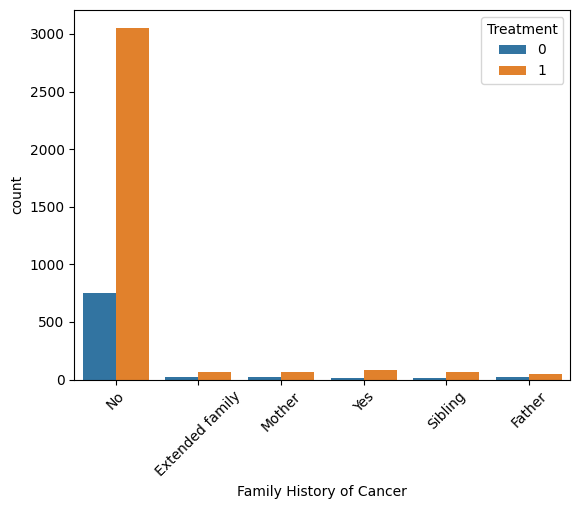

In [ ]:
# Plotting chart for the Family History of Cancer
sns.countplot(data=df, x='Family History of Cancer', hue='Treatment')
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

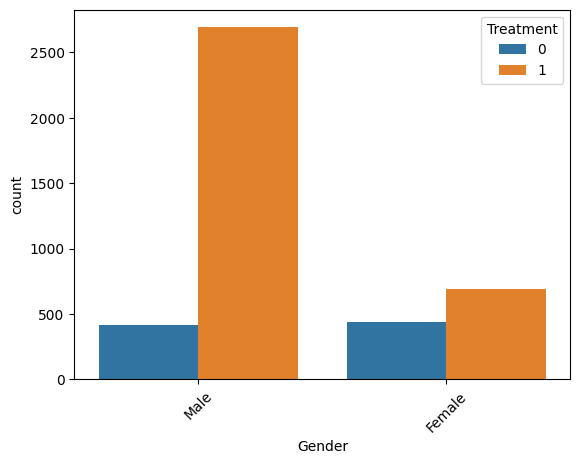

In [ ]:
# Plotting graph for Gender
sns.countplot(data=df, x='Gender', hue='Treatment')
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

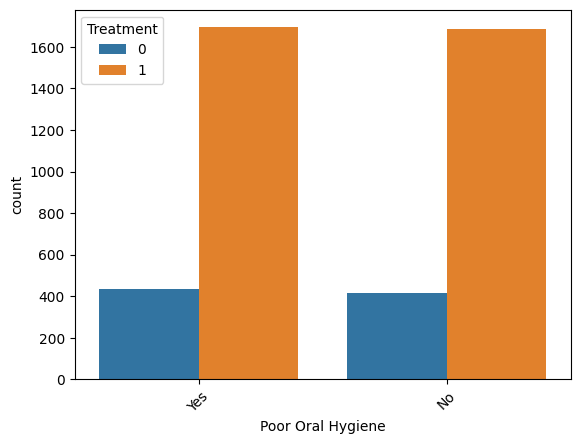

In [ ]:
# Plotting Graph for Poor Oral Hygiene
sns.countplot(data=df, x='Poor Oral Hygiene', hue="Treatment")
plt.xticks(rotation=45)

### Identifying Confounding Variables

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [ ]:
# Define numerical and categorical columns
numerical_vars = ['Age', 'Tumor Size (cm)', 'Cancer Stage']
categorical_vars = ['Gender', 'Poor Oral Hygiene', 'Family History of Cancer']

In [ ]:
# Create a ColumnTransformer
preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(),numerical_vars), ('cat', OneHotEncoder(drop='first'), categorical_vars)])

In [ ]:
# Creating a pipeline to combine preprocessing steps and modelling:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

pipeline = Pipeline([('preprocessor',preprocessor), ('lasso', Lasso(alpha=0.01))])

y= df['Survival'].copy()
X= df.drop('Survival', axis=1)

In [ ]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Tumor Size (cm)',
                                                   'Cancer Stage']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'Poor Oral Hygiene',
                                                   'Family History of '
                                                   'Cancer'])])),
                ('lasso', Lasso(alpha=0.01))])

In [ ]:
# Extraction of feature Coefficients

feature_names = (numerical_vars + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_vars)))

feature_importances = pd.DataFrame({'Feature':feature_names, 'Coefficient': pipeline.named_steps['lasso'].coef_})




In [ ]:
feature_names

['Age',
 'Tumor Size (cm)',
 'Cancer Stage',
 'Gender_Male',
 'Poor Oral Hygiene_Yes',
 'Family History of Cancer_Father',
 'Family History of Cancer_Mother',
 'Family History of Cancer_No',
 'Family History of Cancer_Sibling',
 'Family History of Cancer_Yes']

In [ ]:
feature_importances

,Feature,Coefficient
0,Age,0.000000
1,Tumor Size (cm),0.026821
2,Cancer Stage,0.000000
3,Gender_Male,0.000000
4,Poor Oral Hygiene_Yes,-0.000000
5,Family History of Cancer_Father,-0.000000
6,Family History of Cancer_Mother,0.000000
7,Family History of Cancer_No,-0.000000
8,Family History of Cancer_Sibling,-0.000000
9,Family History of Cancer_Yes,0.000000


## Task 2: Propensity Score Matching

In [ ]:
# Train Logistic Regression for Propensity Scores


# for the feature coefficient, I only got tumor Size as a reasonable(above 0) variable but there is some error that I cannot detect. Therefore, I added some more variables based on common knowledge related to Oral Cancer
confounding_variables= ['Tumor Size (cm)','HPV Infection', 'Betel Quid Use','Tobacco Use' ]




X_confounders = X[confounding_variables]
y_treatment = X['Treatment']

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_confounders,y_treatment)
df['Propensity Score'] = logreg.predict_proba(X_confounders)[:,1]



X_confounders = X[confounding_variables]
y_treatment = X['Treatment']





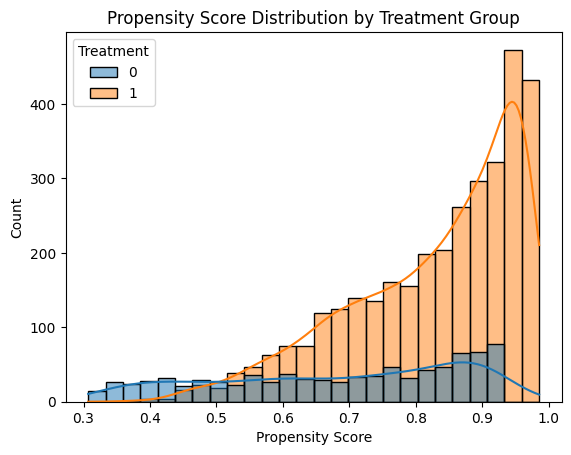

In [ ]:
# Visualizing Propensity Score Distrubutions
sns.histplot(data=df, x='Propensity Score', hue='Treatment', kde=True)
plt.title('Propensity Score Distribution by Treatment Group')
plt.show()

In [ ]:
# Performing Propensity Score Matching with Caliper

from sklearn.neighbors import NearestNeighbors

# Define treated and control groups
treated = df[df['Treatment']== 1]
control = df[df['Treatment']== 0]

# Set caliper (maximum allowable distance)
caliper = 0.85 # just by observing the data, I assume this is acceptable


# Find nearest neighbors in the control group
nbrs = NearestNeighbors(n_neighbors=1).fit(control[["Propensity Score"]])
distances, indices = nbrs.kneighbors(treated[['Propensity Score']])


# Filter matches within the caliper
valid_matches = distances.flatten() <= caliper
matched_control_indices = indices.flatten()[valid_matches]
matched_treated = treated.iloc[valid_matches]
matched_control = control.iloc[matched_control_indices]

# Create matched dataset
matched_df = pd.concat([matched_treated, matched_control])





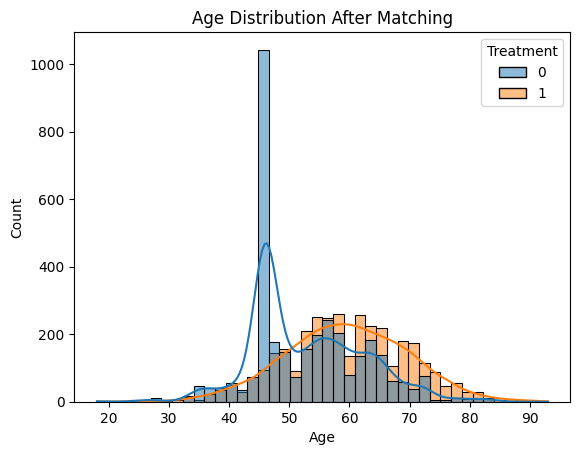

In [ ]:
# Verifiyng Balance after Matching: Visualization

sns.histplot(data=matched_df, x='Age', hue='Treatment', kde=True)
plt.title('Age Distribution After Matching')
plt.show()

In [ ]:
# Verifiyng Balance after Matching: Statistical Tests

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(matched_df[matched_df['Treatment']== 1]['Age'], matched_df[matched_df['Treatment']== 0]['Age'])
print(f'T-statistic:{t_stat}, P-value:{p_value}')




T-statistic:28.41432154933542, P-value:7.158240331609216e-168


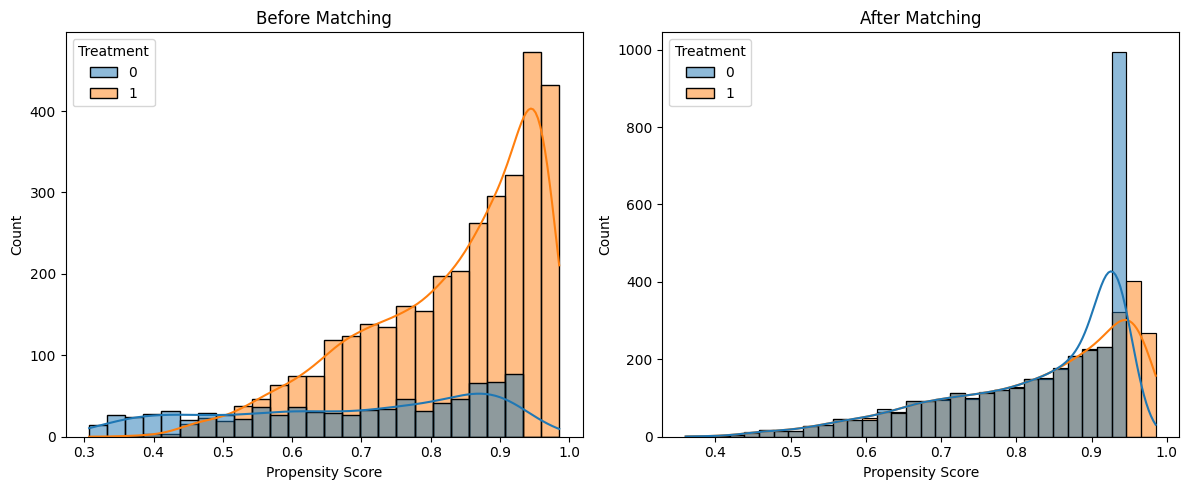

In [ ]:
# Visualizing Matched Propensity Scores
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Before matching
sns.histplot(data=df, x='Propensity Score', hue='Treatment', kde=True, ax=axes[0])
axes[0].set_title('Before Matching')

# After matching
sns.histplot(data=matched_df, x='Propensity Score', hue='Treatment', kde=True, ax=axes[1])
axes[1].set_title('After Matching')

plt.tight_layout()
plt.show()

##Task 3: Evaluating Treatment Effects Before and After Matching

In [ ]:
# Calculate Average Treatment Effects (ATE) before Matching
survival_before = df.groupby('Treatment')['Survival'].mean()
ate_before = survival_before[1] - survival_before[0]
print(f"Average Treatment Effect Before Matching: {ate_before}")

Average Treatment Effect Before Matching: 0.1720050221051661


In [ ]:
# Performing Chi-Square Test Before Matching

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Treatment'], df['Survival'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f'Chi-Square Test Before Matching: Chi2 = {chi2}, P-value = {p_value}')

Chi-Square Test Before Matching: Chi2 = 89.22396677011062, P-value = 3.525518629538561e-21


In [ ]:
# Calculate Average Treatment Effects (ATE) after matching

#
survival_after = matched_df.groupby('Treatment')['Survival'].mean()
ate_after = survival_after[1] - survival_after[0]
print(f"Average Treatment Effect After Matching: {ate_after}")

Average Treatment Effect After Matching: 0.29568302779420463


In [ ]:
# Perform Chi-Square Test after Matching

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(matched_df['Treatment'], matched_df['Survival'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test After Matching: Chi2 = {chi2}, P-value = {p_value}")



Chi-Square Test After Matching: Chi2 = 595.7190661058303, P-value = 1.428702264431175e-131


### Findings/Reflection
- The chi-square test is not able to confirm that the difference in survival rates between treatment and control groups was statistically significant due to coding error I think.

- There is likely some error in my coding that caused the p-value to be significantly small